# Identifying experiments and sessions of interest using the data manifest

This Jupyter notebook illustrates what data is available as part of the <b>Visual Behavior Neuropixels dataset</b>, and provides a brief description of the experimental design and dimensions of the dataset. The notebook will demonstrate how to identify experiments and sessions that you may be interested in analyzing using the data manifests provided by the `VisualBehaviorNeuropixelsProjectCache`, and explore the metadata columns that describe the experimental conditions including transgenic lines, targeted areas, and session types. 

Contents
-------------
* <a href='#Introduction-to-the-metadata-tables'>Introduction to the metadata tables</a>
* <a href='#Ecephys-Sessions-Table'>Ecephys Sessions Table</a>
* <a href='#Behavior-Sessions-Table'>Behavior Sessions Table</a>
* <a href='#Units,-Probes-and-Channels-Tables'>Units, Probes and Channels Table</a>


We will first install allensdk into your environment by running the appropriate commands below. 

## Install AllenSDK into your local environment

You can install AllenSDK locally with:

In [1]:
!pip install allensdk

Defaulting to user installation because normal site-packages is not writeable


## Install AllenSDK into your notebook environment (good for Google Colab)

You can install AllenSDK into your notebook environment by executing the cell below.

If using Google Colab, click on the RESTART RUNTIME button that appears at the end of the output when this cell is complete,. Note that running this cell will produce a long list of outputs and some error messages. Clicking RESTART RUNTIME at the end will resolve these issues.
You can minimize the cell after you are done to hide the output.

In [2]:
!pip install --upgrade pip
!pip install allensdk

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


## Import necessary packages

In [3]:
import numpy as np
import pandas as pd
from pathlib import Path

import allensdk
from allensdk.brain_observatory.behavior.behavior_project_cache.\
    behavior_neuropixels_project_cache \
    import VisualBehaviorNeuropixelsProjectCache

/home/runner/.local/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## First, load the project cache - your access point for all tables and data

In [4]:
# Update this to a valid directory in your filesystem. This is where the data will be stored.
output_dir = "/path/to/vbn_cache"

In [6]:
cache = VisualBehaviorNeuropixelsProjectCache.from_s3_cache(
            cache_dir=Path(output_dir))

/home/runner/work/AllenSDK/AllenSDK/allensdk/api/cloud_cache/cloud_cache.py:413: MissingLocalManifestWarning: This cache directory appears to contain data files, but it has no record of what those files are. You might want to consider running

VisualBehaviorNeuropixelsProjectCache.construct_local_manifest()

to avoid needlessly downloading duplicates of data files that did not change between data releases. NOTE: running this method will require hashing every data file you have currently downloaded and could be very time consuming.

To avoid this warning in the future, make sure that

/tmp/tmpvojbrrbl/_downloaded_data.json

is not deleted between instantiations of this cache
  warnings.warn(msg, MissingLocalManifestWarning)
ecephys_sessions.csv: 100%|██████████| 63.5k/63.5k [00:00<00:00, 587kMB/s] 
behavior_sessions.csv: 100%|██████████| 531k/531k [00:00<00:00, 1.68MMB/s]
units.csv: 100%|██████████| 132M/132M [00:04<00:00, 31.2MMB/s]
probes.csv: 100%|██████████| 127k/127k [00:00<00:00, 

In [7]:
cache = VisualBehaviorNeuropixelsProjectCache.from_s3_cache(
            cache_dir=Path(output_dir))

## Introduction to the metadata tables

## Introduction to the metadata tables

## Introduction to the metadata tables

The data manifest is comprised of 5 types of tables: 

1. `ecephys_sessions_table` (64 kB)
2. `behavior_sessions_table` (531 kB)
3. `units_table` (130 MB)
4. `probes_table` (127 kB)
5. `channels_table` (28 MB)

The `ecephys_sessions_table` contains metadata for every <b>Neuropixels recording session</b> in the dataset. We attempted to insert 6 probes for each experiment, but occasionally individual insertions failed. The `probe_count` column tells you how many probes were inserted for a given session. The `structure_acronyms` column indicates which brain areas were targeted. For the majority of mice, there are two recording sessions. These were run on consecutive days with two different image sets, `G` and `H`. The `experience_level` column tells you whether the image set used for a particular recording was the same as the training image set (`Familiar`), or different from the training image set (`Novel`).

The `behavior_sessions_table` contains metadata for each behavior session. Some behavior sessions have Neuropixels data associated with them, while others took place during training in the behavior facility. The different training stages that mice progressed through are described by the `session_type`. 

The `units_table` contains metadata for every unit in the release. Each unit can be linked to the corresponding recording session, probe and channel by the `ecephys_session_id`, `ecephys_probe_id` and `ecephys_channel_id` columns. This table also contains a number of helpful quality metrics, which can be used to filter out contaminated units before analysis. For more guidance on how to use these metrics, check out [this tutorial](https://allensdk.readthedocs.io/en/latest/_static/examples/nb/visual_behavior_neuropixels_quality_metrics.html).

The `probes_table` contains metadata for each probe insertion.

The `channels_table` contains metadata for each channel recorded during an ephys session. This table provides useful info about where a particular channel is located in the Allen Common Coordinate Framework as well as it's relative position on the probe.

Now let's look at a few of these tables in more detail to get a better sense of the dataset.

The data manifest is comprised of 5 types of tables: 

1. `ecephys_sessions_table` (64 kB)
2. `behavior_sessions_table` (531 kB)
3. `units_table` (130 MB)
4. `probes_table` (127 kB)
5. `channels_table` (28 MB)

The `ecephys_sessions_table` contains metadata for every <b>Neuropixels recording session</b> in the dataset. We attempted to insert 6 probes for each experiment, but occasionally individual insertions failed. The `probe_count` column tells you how many probes were inserted for a given session. The `structure_acronyms` column indicates which brain areas were targeted. For the majority of mice, there are two recording sessions. These were run on consecutive days with two different image sets, `G` and `H`. The `experience_level` column tells you whether the image set used for a particular recording was the same as the training image set (`Familiar`), or different from the training image set (`Novel`).

The `behavior_sessions_table` contains metadata for each behavior session. Some behavior sessions have Neuropixels data associated with them, while others took place during training in the behavior facility. The different training stages that mice progressed through are described by the `session_type`. 

The `units_table` contains metadata for every unit in the release. Each unit can be linked to the corresponding recording session, probe and channel by the `ecephys_session_id`, `ecephys_probe_id` and `ecephys_channel_id` columns. This table also contains a number of helpful quality metrics, which can be used to filter out contaminated units before analysis. For more guidance on how to use these metrics, check out [this tutorial](https://allensdk.readthedocs.io/en/latest/_static/examples/nb/visual_behavior_neuropixels_quality_metrics.html).

The `probes_table` contains metadata for each probe insertion.

The `channels_table` contains metadata for each channel recorded during an ephys session. This table provides useful info about where a particular channel is located in the Allen Common Coordinate Framework as well as it's relative position on the probe.

Now let's look at a few of these tables in more detail to get a better sense of the dataset.

## Ecephys Sessions Table

### Load the `ecephys_sessions_table` from the cache

First let's just look at the columns to see what metadata is provided for each session:

In [8]:
ecephys_sessions_table = cache.get_ecephys_session_table()
ecephys_sessions_table.columns

Index(['behavior_session_id', 'date_of_acquisition', 'equipment_name',
       'session_type', 'mouse_id', 'genotype', 'sex', 'project_code',
       'age_in_days', 'unit_count', 'probe_count', 'channel_count',
       'structure_acronyms', 'image_set', 'prior_exposures_to_image_set',
       'session_number', 'experience_level', 'prior_exposures_to_omissions',
       'file_id', 'abnormal_histology', 'abnormal_activity'],
      dtype='object')

This table gives us lots of useful metadata about each recording session, including the genotype, sex and age of the mouse that was run, what brain areas were recorded and some important info about the stimulus. 

To demystify a few of these columns, let's briefly review the experimental design. Each mouse was trained with one of two image sets (`G` or `H`). For the majority of mice, we recorded two sessions: one with the trained 'familiar' image set and one with a 'novel' image set. Note that two of the eight images were shared across these two image sets as diagrammed below for an example mouse. For this mouse, image set `G` (images on blue and purple backgrounds) was used in training and was therefore 'familiar', while image set `H` (the two holdover images on purple background plus six novel images on red background) was 'novel'. 

<div>
<img src="https://brainmapportal-live-4cc80a57cd6e400d854-f7fdcae.divio-media.net/filer_public/f1/d1/f1d140bc-228a-4328-bdca-e3383a1a46f0/image_sets_and_training_trajectories_diagram_defaultsdk_and_unfiltered.png", width="900"/>
</div>

So, each recording session can be defined by a few parameters, including the `image_set` used (G or H), the `experience_level` of the mouse (indicating whether the mouse had seen the image set in previous training sessions) and the `session_number` (indicating whether it was the first or second recording day for the mouse). In bottom bubble of the above diagram, you can see the three different training/recording trajectories mice in this dataset took:

* Train on G; see G on first recording day; see H on second recording day
* Train on G; see H on first recording day; see G on second recording day
* Train on H; see H on first recording day; see G on second recording day

The numbers in the recording session cells indicate how many of each session type exist in this dataset. The first number is what the SDK returns by default. The second number (in parentheses) is what the SDK returns without filtering for abnormalities (see below as well as the [Data Access tutorial](https://allensdk.readthedocs.io/en/latest/_static/examples/nb/visual_behavior_neuropixels_data_access.html)).

Let's look at how many sessions we have of each type in our ecephys_sessions_table to corroborate these numbers:

In [9]:
sessions_by_imageset_experience_day = ecephys_sessions_table.pivot_table(index=['session_number', 'experience_level'], 
                                                                        columns=['image_set'], 
                                                                        values='behavior_session_id', aggfunc=len)
display(sessions_by_imageset_experience_day)

image_set                           G     H
session_number experience_level            
1              Familiar          38.0  10.0
               Novel              NaN   3.0
2              Familiar           3.0   NaN
               Novel             10.0  39.0

From this table we can see that for most mice, image set `G` was used for training (and therefore `Familiar`) and was also shown during the first recording session (38 sessions in the left cell of the first row above). For these mice, image set `H` was `novel` and shown on the second recording day (right cell of last row). Then there were 3 mice for which image set `G` was used in training, but the novel image set `H` was shown on the first recording day and `G` on the second (rows 2 and 3). Finally, there were 10 mice trained on the `H` image set. All 10 of these saw `H` on their first recording day and `G` on their second (rows 1 and 4).

Keep in mind that though we aimed to record for 2 sessions from each mouse, not every recording session passed quality control. Thus for some mice, only one of the two recording days are represented in the table. This explains the discrepancy between the first and last rows of the table above.

Also note that the probes are retracted after every recording (these are **acute recordings**). Moreover, we move the probes around 100 microns between session 1 and session 2, so it's impossible to map neurons across the two recording days (and it's unlikely that we are recording from the same neurons). 

#### The transgenic line determines which neurons are labeled with ChR2 for identification by optotagging. 

We can also use the `ecephys_sessions` table to find the genotype of the mouse used for each recording session. Across the dataset, we used mice of three genotypes: 

- C57Bl6J (wt)
- Sst-IRES-Cre;Ai32 to optotag putative Sst-expressing interneurons
- Vip-IRES-Cre;Ai32 to optotag putative Vip-expressing interneurons

Somatostatin-positive neurons (Sst) and Vasoactive Intestinal Polypeptide neurons (Vip) constitute [two of the three major cortical inhibitory cell classes](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3556905/#!po=8.92857), and by crossing these lines to the Ai32 reporter line, we can identify these neurons by [optotagging](https://allensdk--2471.org.readthedocs.build/en/2471/_static/examples/nb/visual_behavior_neuropixels_quickstart.html#Optotagging). 

We also record from C57Bl6J `wt/wt` mice.

In [10]:
print('the different transgenic lines included in this dataset are:\n')
print(np.sort(ecephys_sessions_table.genotype.unique()))

the different transgenic lines included in this dataset are:

['Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt'
 'Vip-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt' 'wt/wt']


In [11]:
#Number of sessions per genotype/sex
sessions_by_genotype_sex = ecephys_sessions_table.pivot_table(values='session_number', index='genotype', 
                                                              columns='sex', aggfunc=len)
display(sessions_by_genotype_sex.rename(columns={'session_number': 'session_count'}))

sex,F,M
genotype,,
Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,24,19
Vip-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,4,18
wt/wt,15,23


Now let's see how many **mice** we have for each genotype/sex. The column `mouse_id` gives us a unique identifier for each mouse in the dataset.

In [12]:
#Number of mice per genotype/sex
mice_by_genotype_sex = ecephys_sessions_table.pivot_table(values='mouse_id', index='genotype', 
                                                          columns='sex', aggfunc=lambda x: len(np.unique(x)))
display(mice_by_genotype_sex)

sex,F,M
genotype,,
Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,12,11
Vip-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,2,9
wt/wt,8,12


Lastly, there are two columns to flag potential abnormalities in brain tissue or electrical activity. Since there are many analyses which may not be affected by these issues, we've decided to go ahead and release this data. But by default, the ecephys_sessions_table will not return these sessions. You can get all of the sessions with this call: 

In [13]:
ecephys_sessions_no_filter = cache.get_ecephys_session_table(filter_abnormalities=False)
print(f'Number sessions returned by default: {len(ecephys_sessions_table)}')
print(f'Number of sessions returned without filtering abnormalities: {len(ecephys_sessions_no_filter)}')


Number sessions returned by default: 103
Number of sessions returned without filtering abnormalities: 153


The `abnormal_histology` column indicates where for each mouse we noted possible bleeding or insertion damage. This will be a list of brain regions.  
The `abnormal_activity` column indicates when during the session we noted possible epileptiform activity. This will be a list of times in seconds.

Let's grab one of these 'abnormal' sessions to see what these columns look like:

In [14]:
# grab a session that was flagged for both tissue damage and epileptiform activity
ecephys_sessions_no_filter[['abnormal_histology', 'abnormal_activity']]\
                            [~ecephys_sessions_no_filter['abnormal_histology'].isnull() & 
                            ~ecephys_sessions_no_filter['abnormal_activity'].isnull()].iloc[0]

abnormal_histology    ['Thalamus']
abnormal_activity            [132]
Name: 1052530003, dtype: object

For this example session, it looks like we annotated potential damage in the Thalamus, and irregular firing activity 132 seconds into the session. For more details about how these abnormalities are flagged, check out the technical white paper.

# Behavior Sessions Table

In this dataset, mice are trained on a visual change detection task. This task involves a continuous stream of stimuli, and mice learn to lick in response to a change in the stimulus identity to earn a water reward. There are different stages of training in this task, described below. The metadata for each behavior session in the dataset can be found in the `behavior_sessions_table` and can be used to build a training history for each mouse.

### Load the `behavior_sessions_table` from the cache

In [15]:
behavior_sessions = cache.get_behavior_session_table()

print(f"Total number of behavior sessions: {len(behavior_sessions)}")

behavior_sessions.head()

Total number of behavior sessions: 3424


,equipment_name,genotype,mouse_id,sex,age_in_days,session_number,prior_exposures_to_session_type,prior_exposures_to_image_set,prior_exposures_to_omissions,ecephys_session_id,date_of_acquisition,session_type,image_set
behavior_session_id,,,,,,,,,,,,,
1051333618,BEH.G-Box2,Vip-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,540536,M,85,1,0,NaN,0.0,NaN,2020-09-18 10:02:30.869000,TRAINING_0_gratings_autorewards_15min_0uL_reward,NaN
1052301754,BEH.G-Box2,Vip-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,540536,M,90,4,2,NaN,0.0,NaN,2020-09-23 09:43:25.595000,TRAINING_1_gratings_10uL_reward,NaN
1052374521,NP.1,Vip-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,530862,M,148,44,0,32.0,0.0,1.052342e+09,2020-09-23 15:34:18.179000,EPHYS_1_images_G_3uL_reward,G
1051860415,BEH.G-Box4,wt/wt,533539,F,127,9,0,3.0,0.0,NaN,2020-09-21 09:57:23.650000,TRAINING_4_images_G_training_7uL_reward,G
1052132182,BEH.F-Box5,Vip-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,536480,M,112,8,1,1.0,0.0,NaN,2020-09-22 12:04:46.304000,TRAINING_3_images_G_10uL_reward,G


### What columns does the behavior_session table have and what values can they take?

In [16]:
behavior_sessions.columns

Index(['equipment_name', 'genotype', 'mouse_id', 'sex', 'age_in_days',
       'session_number', 'prior_exposures_to_session_type',
       'prior_exposures_to_image_set', 'prior_exposures_to_omissions',
       'ecephys_session_id', 'date_of_acquisition', 'session_type',
       'image_set'],
      dtype='object')

### Behavior sessions can take place on different experimental systems

In [17]:
print('behavior data could be recorded on these experimental systems:\n')
print(np.sort(behavior_sessions.equipment_name.unique()))

behavior data could be recorded on these experimental systems:

['BEH.B-Box1' 'BEH.B-Box2' 'BEH.B-Box3' 'BEH.B-Box4' 'BEH.B-Box5'
 'BEH.B-Box6' 'BEH.D-Box1' 'BEH.D-Box2' 'BEH.D-Box3' 'BEH.D-Box4'
 'BEH.D-Box5' 'BEH.D-Box6' 'BEH.F-Box1' 'BEH.F-Box2' 'BEH.F-Box3'
 'BEH.F-Box4' 'BEH.F-Box5' 'BEH.F-Box6' 'BEH.G-Box1' 'BEH.G-Box2'
 'BEH.G-Box3' 'BEH.G-Box4' 'BEH.G-Box5' 'BEH.G-Box6' 'NP.0' 'NP.1']


`equipment_name` values starting with 'BEH' indicate behavioral training in the behavior facility, while values starting with 'NP' indicate behavior sessions that took place on an experimental Neuropixels rig.

The `mouse_id` is a 6-digit unique identifier for each experimental animal in the dataset

In [18]:
print('there are', len(behavior_sessions.mouse_id.unique()), 'mice in the dataset')

there are 81 mice in the dataset


Other mouse specific metadata includes `sex`, `age_in_days` and `genotype`.

### Session Type - a very important piece of information

The `session_type` for each behavior session indicates the behavioral training stage or Neuropixels experiment conditions for that particular session. This determines what stimuli were shown and what task parameters were used.  

In [19]:
print('the session_types available in this dataset are:\n')
print(np.sort(behavior_sessions.session_type.unique()))

the session_types available in this dataset are:

['EPHYS_1_images_G_3uL_reward' 'EPHYS_1_images_G_5uL_reward'
 'EPHYS_1_images_H_3uL_reward' 'EPHYS_1_images_H_5uL_reward'
 'HABITUATION_5_images_G_handoff_ready_3uL_reward'
 'HABITUATION_5_images_G_handoff_ready_5uL_reward'
 'HABITUATION_5_images_H_handoff_ready_3uL_reward'
 'HABITUATION_5_images_H_handoff_ready_5uL_reward'
 'TRAINING_0_gratings_autorewards_15min'
 'TRAINING_0_gratings_autorewards_15min_0uL_reward' 'TRAINING_1_gratings'
 'TRAINING_1_gratings_10uL_reward' 'TRAINING_2_gratings_flashed'
 'TRAINING_2_gratings_flashed_10uL_reward'
 'TRAINING_3_images_G_10uL_reward' 'TRAINING_3_images_H_10uL_reward'
 'TRAINING_4_images_G_training' 'TRAINING_4_images_G_training_7uL_reward'
 'TRAINING_4_images_H_training_7uL_reward' 'TRAINING_5_images_G_epilogue'
 'TRAINING_5_images_G_epilogue_5uL_reward'
 'TRAINING_5_images_G_handoff_lapsed_5uL_reward'
 'TRAINING_5_images_G_handoff_ready_5uL_reward'
 'TRAINING_5_images_H_epilogue_5uL_reward'
 

You can see that each session type is prepended with an indicator of when this session was run in the training sequence (for example `TRAINING_0` or `TRAINING_1`). Mice progress through a series of training stages to shape their behavior prior to recording. Mice are automatically advanced between stages depending on their behavioral performance. For a detailed description of the change detection task and advancement criteria, please see the technical whitepaper.

<div>
<img src="https://brainmapportal-live-4cc80a57cd6e400d854-f7fdcae.divio-media.net/filer_public/f4/03/f403ea84-46d2-4e91-94fb-0e8d671ab352/task_shaping_diagram.png" width="900"/>
</div>

Training with the change detection task begins with simple static grating stimuli, changing between 0 and 90 degrees in orientation. On the very first day, mice are automatically given a water reward when the orientation of the stimulus changes (`TRAINING_0_gratings_autorewards_15min`). On subsequent days, mice must lick following the change in order to receive a water reward (`TRAINING_1_gratings`). In the next stage, stimuli are flashed, with a 500 ms inter stimulus interval of mean luminance gray screen (`TRAINING_2_gratings_flashed`). 

Once mice perform the task well with gratings, they are transitioned to natural image stimuli. Different groups of mice are trained with different sets of images, image set `G` or `H` (described above). In the following description, we use `X` as a placeholder for `G` or `H` in the `session_type` name. Training with images begins with a 10ul water reward volume (`TRAINING_3...`), which is then decreased to 7ul once mice perform the task consistently with images (`TRAINING_4...`). If mice continue to perform well, they are advanced to `TRAINING_5_images_X_epilogue_5uL_reward`, during which they are exposed to the receptive field mapping stimulus that will be used during Neuropixels recordings and the reward is further reduced to 5 ul. When mice have reached criterion to be transferred to the Neuropixels portion of the experiment, they are labeled as 'handoff_ready' (`TRAINING_5_images_X_handoff_ready_5uL_reward`.) If behavior performance returns to below criterion level before they are handed off, they are labeled as 'handoff_lapsed'(`TRAINING_5_images_X_handoff_lapsed_5uL_reward`). You may notice inconsistencies with the suffix for a few of these stage names, this reflects a minor change we made early on during data collection to reduce the reward volume from 7ul for `TRAINING_5` to 5ul. After that, we added the volume explicitly to the stage name. 

So now, let's look at the training history for 1 mouse to see how this unfolds:

In [20]:
training_history = behavior_sessions[behavior_sessions['mouse_id']==556016]
training_history = training_history.sort_values(by='date_of_acquisition')
training_history[['session_type', 'equipment_name', 'date_of_acquisition', 'prior_exposures_to_image_set', 'prior_exposures_to_omissions']]

,session_type,equipment_name,date_of_acquisition,prior_exposures_to_image_set,prior_exposures_to_omissions
behavior_session_id,,,,,
1079461839,TRAINING_0_gratings_autorewards_15min_0uL_reward,BEH.G-Box5,2021-01-29 11:20:57.848000,NaN,0.0
1080309252,TRAINING_1_gratings_10uL_reward,BEH.G-Box5,2021-02-01 10:30:41.010000,NaN,0.0
1080567296,TRAINING_1_gratings_10uL_reward,BEH.G-Box5,2021-02-02 10:41:01.736000,NaN,0.0
1081055727,TRAINING_1_gratings_10uL_reward,BEH.G-Box5,2021-02-03 10:08:22.073000,NaN,0.0
1081407988,TRAINING_1_gratings_10uL_reward,BEH.G-Box5,2021-02-04 10:57:59.323000,NaN,0.0
1081665901,TRAINING_2_gratings_flashed_10uL_reward,BEH.G-Box5,2021-02-05 10:17:01.333000,NaN,0.0
1082287921,TRAINING_3_images_G_10uL_reward,BEH.G-Box5,2021-02-08 10:26:15.260000,0.0,0.0
1082721365,TRAINING_3_images_G_10uL_reward,BEH.G-Box5,2021-02-09 10:11:40.992000,1.0,0.0
1082978971,TRAINING_3_images_G_10uL_reward,BEH.G-Box5,2021-02-10 10:36:09.169000,2.0,0.0


This table shows that mouse 556016 was trained for 29 days, starting with non-contingent rewards for changes in grating orientation during `TRAINING_0`, and ending with two Neuropixels recording sessions running the change detection task with flashing images (the `EPHYS` stages). All sessions before the `HABITUATION` stage were run in behavior boxes. From `HABITUATION` on, sessions were run on the experimental Neuropixels rig `NP.0`.

The `prior_exposures_to_image_set` column indicates how many times the mouse had seen the image set used in a particular session. For example, by the time the mouse above reached its first recording day (`EPHYS_1_images_G_3uL_reward`), it had already seen the `G` image set in 21 previous sessions. On the second recording day, it was exposed to the `H` image set for the first time.

The `EPHYS` sessions run during Neuropixels recordings are the first time the mouse encounters omitted stimuli. During these sessions, we omit a little under 5% of the stimulus flashes to investigate temporal expectation signals. The `prior_exposures_to_omissions` column indicates whether the mouse has encountered omissions in a previous recording session. Note that it is '0' for all but the second recording day.

## Units, Probes and Channels Tables

Now let's look at the units, probes and channels tables in a bit more detail. We'll start with the units table, which contains info about every unit recorded in this dataset:

In [21]:
units = cache.get_unit_table()
print(f'This dataset contains {len(units)} total units')

units.head()

This dataset contains 319013 total units


,ecephys_channel_id,ecephys_probe_id,ecephys_session_id,amplitude_cutoff,anterior_posterior_ccf_coordinate,dorsal_ventral_ccf_coordinate,left_right_ccf_coordinate,cumulative_drift,d_prime,structure_acronym,...,valid_data,amplitude,waveform_duration,waveform_halfwidth,PT_ratio,recovery_slope,repolarization_slope,spread,velocity_above,velocity_below
unit_id,,,,,,,,,,,,,,,,,,,,,
1157005856,1157001834,1046469925,1046166369,0.500000,8453.0,3353.0,6719.0,140.32,6.088133,MB,...,True,286.132665,0.151089,0.096147,0.310791,-0.227726,0.961313,20.0,-0.457845,NaN
1157005853,1157001834,1046469925,1046166369,0.323927,8453.0,3353.0,6719.0,239.76,4.635583,MB,...,True,181.418835,0.357119,0.192295,0.531490,-0.150522,0.732741,30.0,2.060302,-2.060302
1157005720,1157001786,1046469925,1046166369,0.044133,8575.0,3842.0,6590.0,263.32,5.691955,MRN,...,True,180.866205,0.521943,0.178559,0.612217,-0.024239,0.539687,80.0,0.000000,0.863364
1157006074,1157001929,1046469925,1046166369,0.000583,8212.0,2477.0,6992.0,154.64,6.049284,NOT,...,True,574.984215,0.343384,0.192295,0.470194,-0.356670,2.258649,40.0,1.373534,0.000000
1157006072,1157001929,1046469925,1046166369,0.500000,8212.0,2477.0,6992.0,242.58,4.745499,NOT,...,True,315.794115,0.329648,0.164824,0.488276,-0.210010,1.320270,70.0,0.412060,0.343384


For more information about many of the metrics included in this table and how to use them to guide your analysis, see our [quality metrics tutorial](https://allensdk--2471.org.readthedocs.build/en/2471/_static/examples/nb/visual_behavior_neuropixels_quality_metrics.html). For now, here's a brief description of each column:


**General Metadata**  

`ecephys_channel_id`:                   unique ID of channel on which unit's peak waveform occurred  
`ecephys_probe_id`:                     unique ID for probe on which unit was recorded  
`ecephys_session_id`:                   unique ID for session during which unit was recorded  
`anterior_posterior_ccf_coordinate`:    CCF coord in the AP axis  
`dorsal_ventral_ccf_coordinate`:        CCF coord in the DV axis  
`left_right_ccf_coordinate`:            CCF coord in the left/right axis  
`structure_acronym`:                    CCF acronym for area to which unit was assigned  
`structure_id`:                         CCF structure ID for the area to which unit was assigned  
`probe_horizontal_position`:            Horizontal (perpindicular to shank) probe position of each unit's peak channel in microns  
`probe_vertical_position`:              Vertical (along shank) probe position of each unit's peak channel in microns


**Waveform metrics**: Look [here](https://github.com/AllenInstitute/ecephys_spike_sorting/tree/master/ecephys_spike_sorting/modules/mean_waveforms) for more detail on these metrics and the code that computes them. For the below descriptions the '1D waveform' is defined as the waveform on the peak channel. The '2D waveform' is the waveform across channels centered on the peak channel.

`amplitude`:                            Peak to trough amplitude for mean 1D waveform in microvolts   
`waveform_duration`:                    Time from trough to peak for 1D waveform in milliseconds     
`waveform_halfwidth`:                   Width of 1D waveform at half-amplitude in milliseconds  
`PT_ratio`:                             Ratio of the max (peak) to the min (trough) amplitudes for 1D waveform  
`recovery_slope`:                       Slope of recovery of 1D waveform to baseline after repolarization (coming down from peak)  
`repolarization_slope`:                 Slope of repolarization of 1D waveform to baseline after trough  
`spread`:                               Range of channels for which the spike amplitude was above 12% of the peak channel amplitude  
`velocity_above`:                       Slope of spike propagation velocity traveling in dorsal direction from soma (note to avoid infinite values, this is actaully the inverse of velocity: ms/mm)  
`velocity_below`:                       Slope of spike propagation velocity traveling in ventral direction from soma (note to avoid infinite values, this is actually the inverse of velocity: ms/mm)  
`snr`:                                  signal-to-noise ratio for 1D waveform        


**Quality metrics**: Look [here](https://github.com/AllenInstitute/ecephys_spike_sorting/tree/7e567a6fc3fd2fc0eedef750b83b8b8a0d469544/ecephys_spike_sorting/modules/quality_metrics) for more detail on these metrics and the code that computes them.

`amplitude_cutoff`:                     estimate of miss rate based on amplitude histogram (ie fraction of spikes estimated to have been below detection threshold)  
`cumulative_drift`:                     cumulative change in spike depth along probe throughout the recording  
`d_prime`:                              classification accuracy based on LDA  
`firing_rate`:                          Mean firing rate over entire recording  
`isi_violations`:                       Ratio of refractory violation rate to total spike rate  
`isolation_distance`:                   Distance to nearest cluster in Mahalanobis space   
`l_ratio`:                              The Mahalanobis distance and chi-squared inverse cdf are used to find the probability of cluster membership for each spike.  
`max_drift`:                            Maximum change in unit depth across recording  
`nn_hit_rate`:                          Fraction of nearest neighbors in PCA space for spikes in unit cluster that are also in unit cluster  
`nn_miss_rate`:                         Fraction of nearest neighbors for spikes outside unit cluster than are in unit cluster  
`presence_ratio`:                       Fraction of time during session for which a unit was spiking  
`silhouette_score`:                     Standard metric for cluster overlap, computed in PCA space  
`quality`:                              Label assigned based on waveform shape as described [here](https://github.com/AllenInstitute/ecephys_spike_sorting/tree/7e567a6fc3fd2fc0eedef750b83b8b8a0d469544/ecephys_spike_sorting/modules/noise_templates). Either 'good' for physiological waveforms or 'noise' for artifactual waveforms.



Note that each unit can be traced to an experiment (`ecephys_session_id`), probe (`ecephys_probe_id`) and channel (`ecephys_channel_id`). Let's filter this table to see all of the units recorded for one ecephys_session from our ecephys_sessions_table:

In [22]:
#grab the ecephys session id for one experiment; these session ids are the indices of the ecephys_sessions_table
session_id = ecephys_sessions_table.index.values[1]
session_units = units[units['ecephys_session_id']==session_id]
session_units.head()

,ecephys_channel_id,ecephys_probe_id,ecephys_session_id,amplitude_cutoff,anterior_posterior_ccf_coordinate,dorsal_ventral_ccf_coordinate,left_right_ccf_coordinate,cumulative_drift,d_prime,structure_acronym,...,valid_data,amplitude,waveform_duration,waveform_halfwidth,PT_ratio,recovery_slope,repolarization_slope,spread,velocity_above,velocity_below
unit_id,,,,,,,,,,,,,,,,,,,,,
1055691078,1055688702,1051284115,1051155866,0.014377,8116.0,4256.0,8158.0,0.00,3.591360,TH,...,True,147.680000,1.593300,0.700503,1.166523,-0.076320,0.230221,170.0,2.506700,-1.327750
1055691190,1055688884,1051284115,1051155866,0.099036,8608.0,2590.0,9042.0,439.38,3.359853,CA1,...,True,198.552705,0.590620,0.315913,0.376350,-0.020334,0.382136,120.0,-1.053043,-1.579564
1055691057,1055688685,1051284115,1051155866,0.192007,8077.0,4364.0,8090.0,152.40,2.785917,ZI,...,True,205.294635,0.247236,0.164824,0.873837,-0.225462,0.927786,70.0,0.343384,-0.824121
1055691088,1055688710,1051284115,1051155866,0.500000,8137.0,4196.0,8191.0,285.13,4.937366,LGv,...,True,175.207695,0.288442,0.151089,0.374370,-0.071037,0.480095,70.0,-0.137353,-0.755444
1055691262,1055688926,1051284115,1051155866,0.207075,8778.0,2177.0,9318.0,247.35,3.570518,VISl,...,True,161.840055,0.398325,0.151089,0.466350,-0.016731,0.422141,50.0,0.686767,0.000000


In [23]:
# Looks like we inserted all 6 probes during this experiment
session_probes_from_units_table = np.sort(session_units.ecephys_probe_id.unique())
print(f'We recorded from {len(session_probes_from_units_table)} probes this session')

We recorded from 6 probes this session


Let's grab the probes table and check that when we filter by this ecephys session id, we get the same probes as above:

In [24]:
probes = cache.get_probe_table()
session_probes = probes[probes.ecephys_session_id==session_id].index.values
np.all(session_probes_from_units_table==session_probes)

True

The probes table has a bit more metadata about the probe type (Neuropixels 1.0), the areas that each probe passed through, and the unit count and sampling rates:

In [25]:
probes.head()

,ecephys_session_id,name,sampling_rate,lfp_sampling_rate,phase,has_lfp_data,unit_count,channel_count,structure_acronyms
ecephys_probe_id,,,,,,,,,
1044506933,1044385384,probeB,30000.178402,2500.014867,1.0,True,701,384,"['CA1', 'DG', 'LP', 'POL', 'PoT', 'VISpm', 'ro..."
1044506934,1044385384,probeC,30000.049852,2500.004154,1.0,True,307,384,"['MB', 'MRN', 'POST', 'SCig', 'VISp', 'root']"
1044506935,1044385384,probeD,30000.029115,2500.002426,1.0,True,521,384,"['CA1', 'CA3', 'DG', 'LGv', 'MB', 'TH', 'VISl'..."
1044506936,1044385384,probeE,30000.075851,2500.006321,1.0,True,282,384,"['CA1', 'DG', 'MB', 'MGd', 'MGm', 'MRN', 'SGN'..."
1044506937,1044385384,probeF,29999.959578,2499.996631,1.0,True,368,384,"['CA1', 'DG', 'LP', 'MRN', 'POL', 'PoT', 'SGN'..."


Now let's get the channels table:

In [26]:
channels = cache.get_channel_table()
channels.head()

,ecephys_probe_id,ecephys_session_id,probe_channel_number,probe_vertical_position,probe_horizontal_position,anterior_posterior_ccf_coordinate,dorsal_ventral_ccf_coordinate,left_right_ccf_coordinate,structure_acronym,unit_count,valid_data
ecephys_channel_id,,,,,,,,,,,
1049365509,1048089911,1047969464,0,20.0,43.0,8445.0,4013.0,6753.0,MRN,0,True
1049365511,1048089911,1047969464,1,20.0,11.0,8443.0,4005.0,6755.0,MRN,5,True
1049365512,1048089911,1047969464,2,40.0,59.0,8441.0,3997.0,6757.0,MRN,0,True
1049365513,1048089911,1047969464,3,40.0,27.0,8439.0,3989.0,6759.0,MRN,5,True
1049365514,1048089911,1047969464,4,60.0,43.0,8438.0,3981.0,6761.0,MRN,7,True


In [27]:
channels.probe_channel_number.max()

383

We can join the channels and units tables to get full CCF info about every unit.

In [28]:
#first let's merge the units and channels tables
session_units_channels = session_units.merge(channels, left_on='ecephys_channel_id', right_index=True)

Now let's use this info to plot each unit's CCF position grouped by probe for our example session:

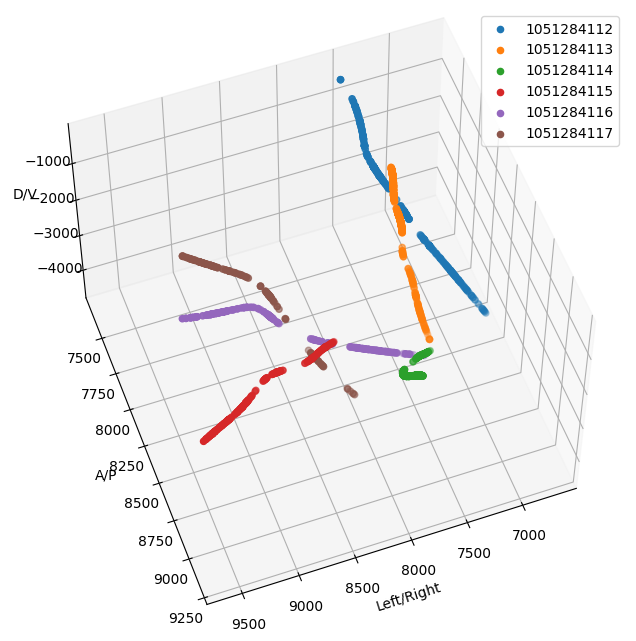

In [29]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  

fig = plt.figure()
fig.set_size_inches([14,8])
ax = fig.add_subplot(111, projection='3d')
def plot_probe_coords(probe_group):
    ax.scatter(probe_group['left_right_ccf_coordinate_x'],
                probe_group['anterior_posterior_ccf_coordinate_x'],
                -probe_group['dorsal_ventral_ccf_coordinate_x'], #reverse the z coord so that down is into the brain
                )
    return probe_group['ecephys_probe_id_x'].values[0]

probe_ids = session_units_channels.groupby('ecephys_probe_id_x').apply(plot_probe_coords)

ax.set_zlabel('D/V')
ax.set_xlabel('Left/Right')
ax.set_ylabel('A/P')
ax.legend(probe_ids)
ax.view_init(elev=55, azim=70)



You can see that these probe trajectories wiggle a bit. That's because we're plotting them in CCF space. When we warp the brains into this space, the probe trajectories can bend.